# Sentiment Analysis

In this notebook, I will analyse the sentiments of the tweets of the 3 politicians to see who is more expressive and who is more diplomatic in their ways

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from textblob import TextBlob

### Read the clean data

In [3]:
trump = pd.read_csv("data/DonaldTrumpClean.csv")
obama = pd.read_csv("data/BarackObamaClean.csv")
clinton = pd.read_csv("data/HillaryClintonClean.csv")

### Define function to attach sentiments

In [4]:
def getSentiment(df_tweet_polarity_desc):
    if df_tweet_polarity_desc['sentiment'] > 0:
        val = "Positive"
    elif df_tweet_polarity_desc['sentiment'] == 0:
        val = "Neutral"
    else:
        val = "Negative"
    return val

### Use textBlob to calculate the sentiment score and the polarity score

In [5]:
def textBlob(df):
    bloblist_desc = list()
    df_tweet_descr_str=df['text'].astype(str)
    for row in df_tweet_descr_str:
        blob = TextBlob(row)
        bloblist_desc.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
        df_tweet_polarity_desc = pd.DataFrame(bloblist_desc, columns = ['sentence','sentiment','polarity'])

    df['sentiment'] = df_tweet_polarity_desc['sentiment']
    df['polarity'] = df_tweet_polarity_desc['polarity']
    return df

In [6]:
trump = textBlob(trump)
trump['Sentiment_Type'] = trump.apply(getSentiment, axis=1)

obama = textBlob(obama)
obama['Sentiment_Type'] = obama.apply(getSentiment, axis=1)

clinton = textBlob(clinton)
clinton['Sentiment_Type'] = clinton.apply(getSentiment, axis=1)

### Calculate number of positive, negative, and neutral tweets

In [7]:
trump_group = trump.groupby("Sentiment_Type").size().reset_index(name="Trump tweets")
obama_group = obama.groupby("Sentiment_Type").size().reset_index(name="Obama tweets")
clinton_group = clinton.groupby("Sentiment_Type").size().reset_index(name="Clinton tweets")

### Convert the numbers into a percentage so that all 3 are politicians are represented equally

In [8]:
trump_group['Trump tweets'] = trump_group['Trump tweets']*100/trump_group['Trump tweets'].sum()
obama_group['Obama tweets'] = obama_group['Obama tweets']*100/obama_group['Obama tweets'].sum()
clinton_group['Clinton tweets'] = clinton_group['Clinton tweets']*100/clinton_group['Clinton tweets'].sum()

### Join all 3 data frames to create 1 combined dataframe which will be used for plotting

In [9]:
sentiment_df = trump_group.set_index('Sentiment_Type').join(obama_group.set_index('Sentiment_Type')).join(clinton_group.set_index('Sentiment_Type'))

In [10]:
sentiment_df = sentiment_df.reset_index()

### Plot the graph

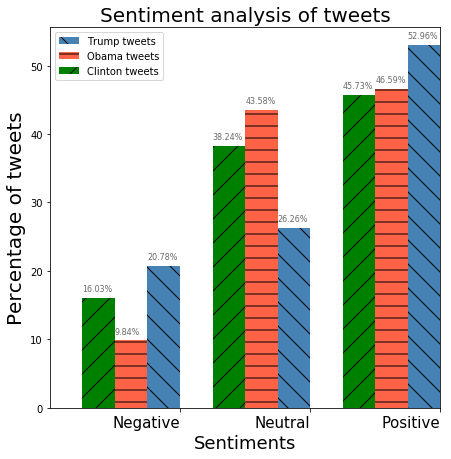

In [20]:
DIMS = (7,7)
width=0.25

#Create the figure
fig = plt.figure(figsize=DIMS)

#Add the subplot
ax = fig.add_subplot(111)

#Plot the tweets
sentiment_df.plot(kind='bar', x='Sentiment_Type', y='Trump tweets', ax=ax, position=1, width=width, color='steelblue', hatch="\\")
sentiment_df.plot(kind='bar', x='Sentiment_Type', y='Obama tweets', ax=ax, position=2, width=width, color='tomato',  hatch='-')
sentiment_df.plot(kind='bar', x='Sentiment_Type', y='Clinton tweets', ax=ax, position=3, width=width, color='green',  hatch='/')

#Add the x axis labels of the plot
ax.set_xticklabels(["Negative","Neutral", "Positive"], rotation=0, fontsize=15, horizontalalignment="right")

#Add the title of the plot
ax.set_title("Sentiment analysis of tweets", fontsize=20)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x(), i.get_height()+1, \
            str(round((i.get_height()), 2))+"%", fontsize=8, color='dimgrey', horizontalalignment='left')
    
plt.xlabel("Sentiments", fontsize=18)
plt.ylabel("Percentage of tweets", fontsize=20)
plt.legend(fontsize=10)
#Finally, show the plot
plt.show()

<div class="alert alert-success">
**Insights** <br/>
1. Obama rarely publishes negative tweets <br/>
2. Obama is more diplomatic and keeps his tweets also mostly neutral <br/>
3. Trump is very expressive of his feelings (He has the highest in Positive as well as Negative) <br/>
4. Clinton is moderate in her tweets and has a nice mix of all 3 sentiments
</div>

# Time-series analysis of sentiments

In [20]:
trump_copy.head()

,date,retweet,text,author,sentiment,polarity,Sentiment_Type,quarters
0,2016-10-07,False,Here is my statement.,DonaldTrump,0.000000,0.000000,Neutral,12
1,2016-10-10,False,Is this really America? Terrible!,DonaldTrump,-0.400000,0.600000,Negative,12
2,2016-10-08,False,The media and establishment want me out of the...,DonaldTrump,-0.447222,0.477778,Negative,12
3,2016-10-11,False,"Wow, @CNN Town Hall questions were given to Cr...",DonaldTrump,0.033333,0.400000,Positive,12
4,2016-10-10,False,Debate polls look great thank you!#MAGA #Amer...,DonaldTrump,0.800000,0.750000,Positive,12


In [21]:
#Splitting into quarters as demonstrated in the previous notebook
trump['date'] = pd.to_datetime(trump['date'])
obama['date'] = pd.to_datetime(obama['date'])
clinton['date'] = pd.to_datetime(clinton['date'])

trump_copy = trump.copy()
obama_copy = obama.copy()
clinton_copy = clinton.copy()

#Creating a new column to change the date to quarter number
trump_copy['quarters'] = trump_copy.date.dt.quarter + (trump_copy.date.dt.year - 2014)*4
obama_copy['quarters'] = obama_copy.date.dt.quarter + (obama_copy.date.dt.year - 2014)*4
clinton_copy['quarters'] = clinton_copy.date.dt.quarter + (clinton_copy.date.dt.year - 2014)*4

#Converting the columns to integer
trump_copy['quarters'] = trump_copy['quarters'].astype(int)
obama_copy['quarters'] = obama_copy['quarters'].astype(int)
clinton_copy['quarters'] = clinton_copy['quarters'].astype(int)

In [47]:
quarters = ['2014-Q1', '2014-Q2', '2014-Q3', '2014-Q4', 
           '2015-Q1', '2015-Q2', '2015-Q3', '2015-Q4',
           '2016-Q1', '2016-Q2', '2016-Q3']

In [46]:
trump_crosstab = pd.crosstab(trump_copy['quarters'], trump_copy['Sentiment_Type'])
trump_crosstab.drop(12, inplace=True)
trump_crosstab.head()

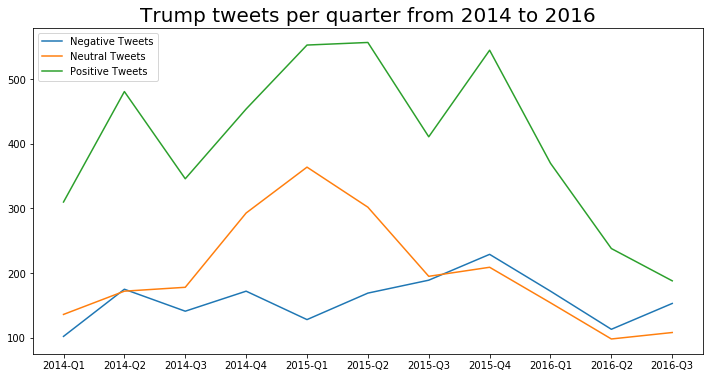

In [51]:
plt.figure(figsize=(12, 6))  # width:20, height:6
plt.title("Trump tweets per quarter from 2014 to 2016", fontsize=20)
plt.plot(quarters, trump_crosstab['Negative'])
plt.plot(quarters, trump_crosstab['Neutral'])
plt.plot(quarters, trump_crosstab['Positive'])

plt.legend(['Negative Tweets', 'Neutral Tweets', 'Positive Tweets'], loc='upper left')
plt.show()

<div class="alert alert-success">
**Insights** <br/>
As we can see, Trump's overall number of tweets has fallen by far in 2016-Q3.<br/>
However, this fall is impacted heavily due to the fact that he has reduced his positive tweets by a huge extent.
His neutral tweets have slightly risen from the previous quarter.
His negative tweets have tisen considerable from the previous quarter.<br/><br/>

This graph, thus shows that coming closer to the elections, Trump started tweeting negatively (probably about his competitors) while he reduced the #MakeAmericaGreatAgain campaign
</div>

In [53]:
obama_crosstab = pd.crosstab(obama_copy['quarters'], obama_copy['Sentiment_Type'])
obama_crosstab.drop(12, inplace=True)
obama_crosstab.head()

Sentiment_Type,Negative,Neutral,Positive
quarters,,,
1,39,165,163
2,26,122,119
3,23,68,104
4,19,76,102
5,19,70,96


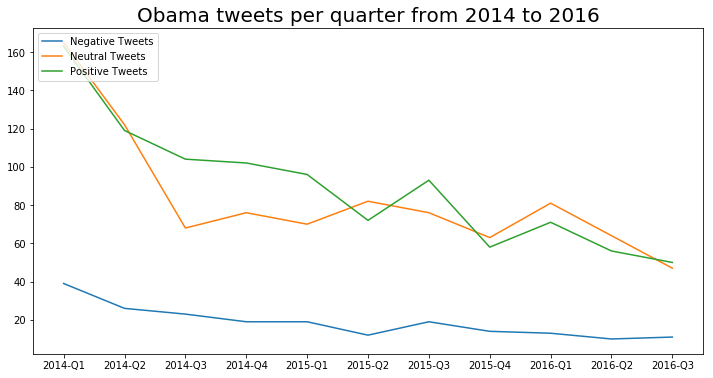

In [54]:
plt.figure(figsize=(12, 6))  # width:20, height:6
plt.title("Obama tweets per quarter from 2014 to 2016", fontsize=20)
plt.plot(quarters, obama_crosstab['Negative'])
plt.plot(quarters, obama_crosstab['Neutral'])
plt.plot(quarters, obama_crosstab['Positive'])

plt.legend(['Negative Tweets', 'Neutral Tweets', 'Positive Tweets'], loc='upper left')
plt.show()

<div class="alert alert-success">
**Insights** <br/>
As for Obama, overall his tweets have also fallen coming closer to 2016 Quarter 3<br/>
His negative tweets are almost negligible while positive and neutral are extremely similar in number

</div>

In [55]:
clinton_crosstab = pd.crosstab(clinton_copy['quarters'], clinton_copy['Sentiment_Type'])
clinton_crosstab.drop(12, inplace=True)
clinton_crosstab.head()

Sentiment_Type,Negative,Neutral,Positive
quarters,,,
5,3,9,15
6,19,111,138
7,54,134,164
8,80,169,200
9,108,264,315


In [57]:
#Becuase we have no data on clinton's tweets in 2014
quarters = ['2015-Q1', '2015-Q2', '2015-Q3', '2015-Q4',
           '2016-Q1', '2016-Q2', '2016-Q3']

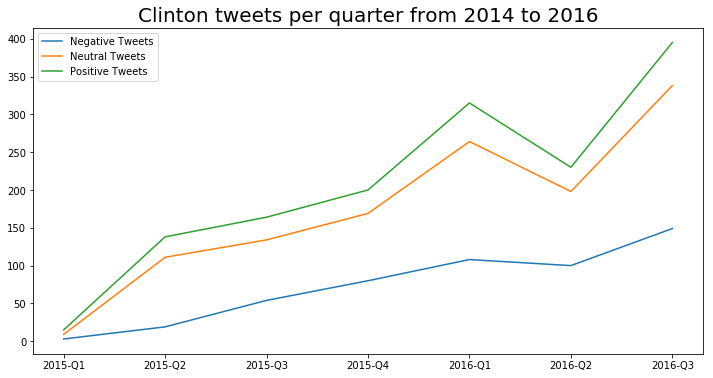

In [58]:
plt.figure(figsize=(12, 6))  # width:20, height:6
plt.title("Clinton tweets per quarter from 2014 to 2016", fontsize=20)
plt.plot(quarters, clinton_crosstab['Negative'])
plt.plot(quarters, clinton_crosstab['Neutral'])
plt.plot(quarters, clinton_crosstab['Positive'])

plt.legend(['Negative Tweets', 'Neutral Tweets', 'Positive Tweets'], loc='upper left')
plt.show()

<div class="alert alert-success">
**Insights**: 
Hillary's trend is completely different from that of Obama and Trump.<br/>
While the other 2 had a decreasing trend, she has an increasing one with the positive tweets increasing at a faster rate than the neutral which in turn is much faster than the negativity. <br/>

Overall, Hillary has expressed a good mixture of sentiments.
</div>